# Prodigy Infotech DS Internship TASK #2

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset and explore the relationships between variables and identify patterns and trends in the data.

#### >>>Dataset Used-: Titanic dataset imported from Kaggle (consisting of train and test data)

In [1]:
#Importing python libraries & Reading the .CSV file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_train=pd.read_csv("titanic_train.csv")

### Previewing and Analysing Dataset

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_train.shape

(891, 12)

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C


In [11]:
df_train.nunique().sort_values() #Checking for unique values

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [12]:
df_train.isnull().sum() #Checking for null/missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

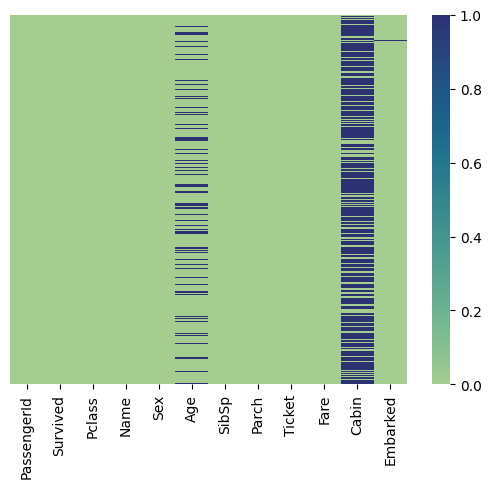

In [13]:
## Visualising NULL values for each column by heatmap for better understanding
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='crest')

In [14]:
## Percentage of NULL values in each column
df_train.isnull().sum().sort_values(ascending=False)*100/len(df_train)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [15]:
## We see that Cabin Column contains more than 75 % of null values

### Dropping Cabin along with some unnecessary columns

In [16]:
df_train.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [17]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Handling Missing Values

In [18]:
## Filling missing value with the mean value of age column
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

## Filling missing value with the mode value of Embarked column
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)


In [19]:
df_train.isnull().sum() # All the missing values present in the data set has been cleared out

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Visualisation

### Survival Column

Survived
0    549
1    342
Name: count, dtype: int64

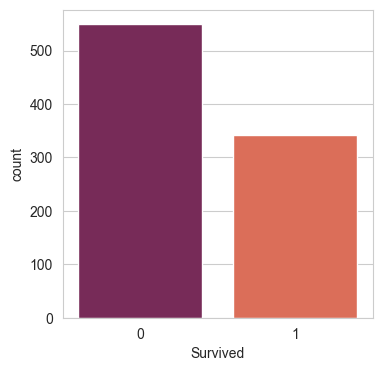

In [20]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['Survived'], palette='rocket')
df_train['Survived'].value_counts()

The above plot clearly shows that number of people died are significantly more than the people that are actually survived.

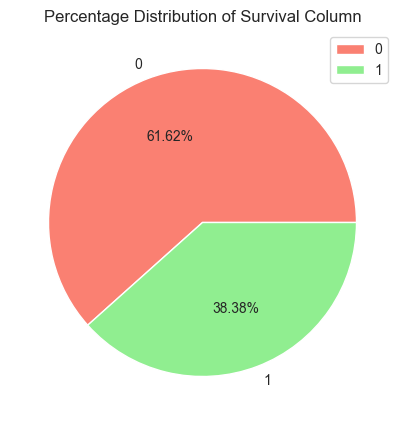

In [21]:
## Percentage Distribution of Survived Column
plt.figure(figsize=(5,5))
plt.pie(df_train['Survived'].value_counts().values,labels=df_train['Survived'].value_counts().index,autopct='%.2f%%',colors=['salmon','lightgreen'])
plt.title('Percentage Distribution of Survival Column')
plt.legend()
plt.show()

### Sex Column

Sex
male      577
female    314
Name: count, dtype: int64

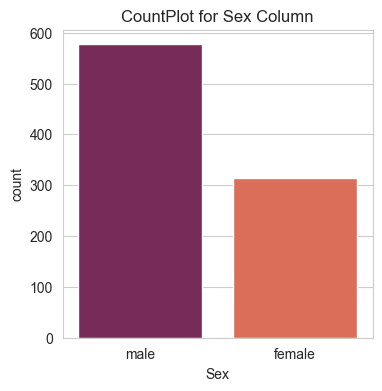

In [22]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['Sex'], palette='rocket')
plt.title('CountPlot for Sex Column')
df_train['Sex'].value_counts()

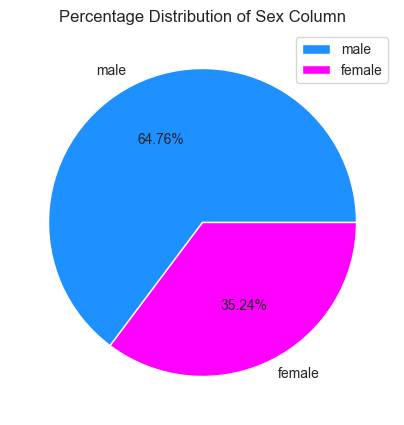

In [23]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(df_train['Sex'].value_counts().values,labels=df_train['Sex'].value_counts().index,autopct='%.2f%%',colors=['dodgerblue','magenta'])
plt.title('Percentage Distribution of Sex Column')
plt.legend()
plt.show()

The pie chart depicts that the percentage of male onboard are more than female on the ship.

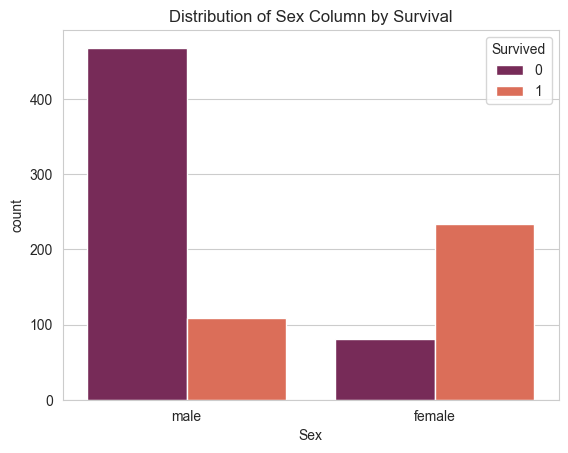

In [24]:
## Number of people survived by Gender
sns.countplot(x='Sex',hue='Survived',data=df_train, palette='rocket')
plt.title('Distribution of Sex Column by Survival')
plt.show()

This above plot shows that the death rate of male are more than female where as the survival rate of females are more than male.

In [27]:
## Percentage distribution of Sex by Survived
df_train.groupby(['Sex'])['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

### Pclass Column

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

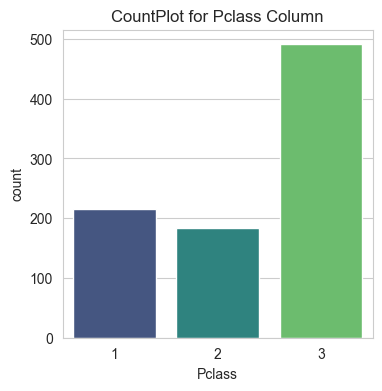

In [28]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['Pclass'], palette='viridis')
plt.title('CountPlot for Pclass Column')
df_train['Pclass'].value_counts()

People belongs to class 3 are survived more compared to other two classes.

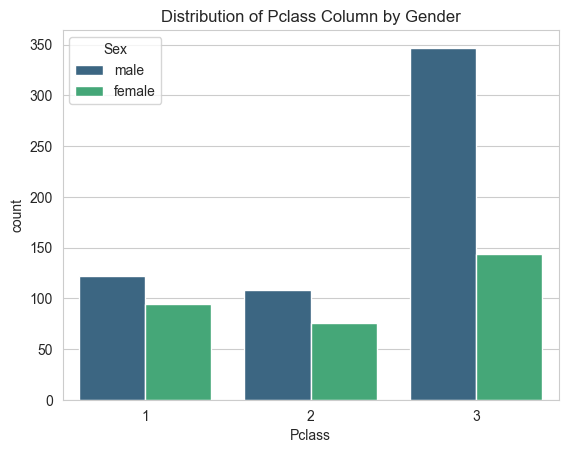

In [29]:
## Number of people by Gender in respective Pclass
sns.countplot(x='Pclass',hue='Sex',data=df_train, palette='viridis')
plt.title('Distribution of Pclass Column by Gender')
plt.show()

The proportion of male was higher than that of female in class 3

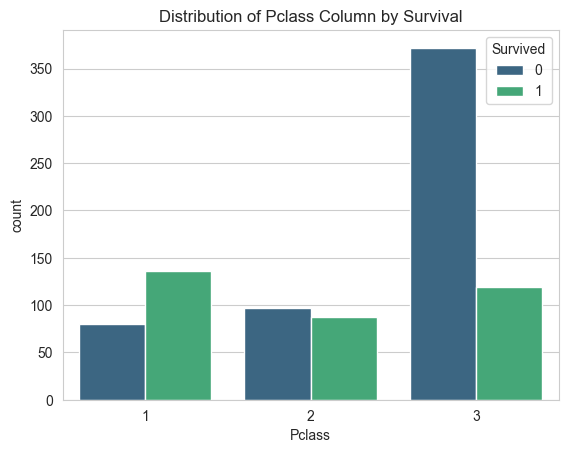

In [30]:
## Number of people survived by Pclass
sns.countplot(x='Pclass',hue='Survived',data=df_train, palette='viridis')
plt.title('Distribution of Pclass Column by Survival')
plt.show()

In [31]:
## Percentage distribution of Pclass by Survived
df_train.groupby(['Pclass'])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

### SibSp Column

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

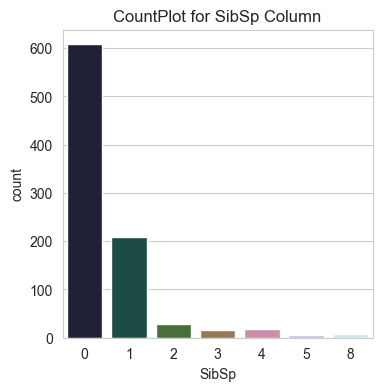

In [32]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['SibSp'], palette='cubehelix')
plt.title('CountPlot for SibSp Column')
df_train['SibSp'].value_counts()

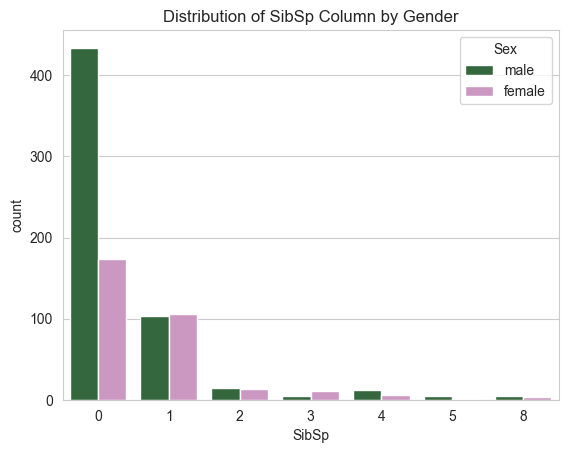

In [33]:
## Number of people by Gender having Siblings or Spouse
sns.countplot(x='SibSp',hue='Sex',data=df_train, palette='cubehelix')
plt.title('Distribution of SibSp Column by Gender')
plt.show()

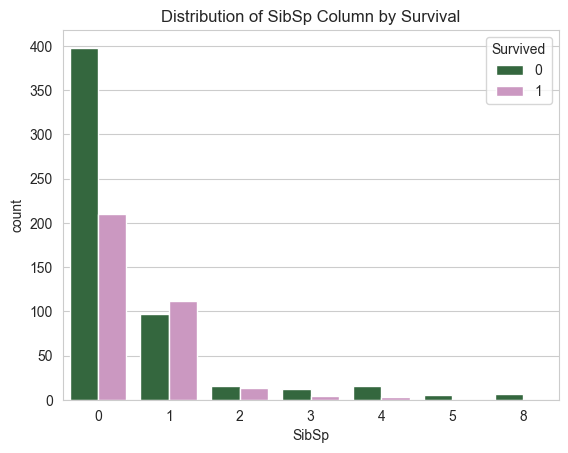

In [34]:
## Number of people survived having Sibling or Spouse
sns.countplot(x='SibSp',hue='Survived',data=df_train, palette='cubehelix')
plt.title('Distribution of SibSp Column by Survival')
plt.show()

In [35]:
## Percentage distribution of SibSp by Survived
df_train.groupby(['SibSp'])['Survived'].mean()*100

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

### Distribution of Age Column

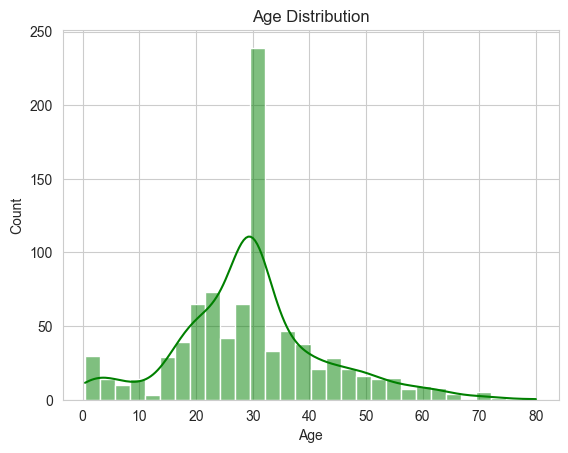

In [36]:
sns.histplot(x=df_train['Age'],kde=True,color='g')
plt.title('Age Distribution')
plt.show()

We can observe that the maximum number of people onboard are generally lies between 20-40 age group

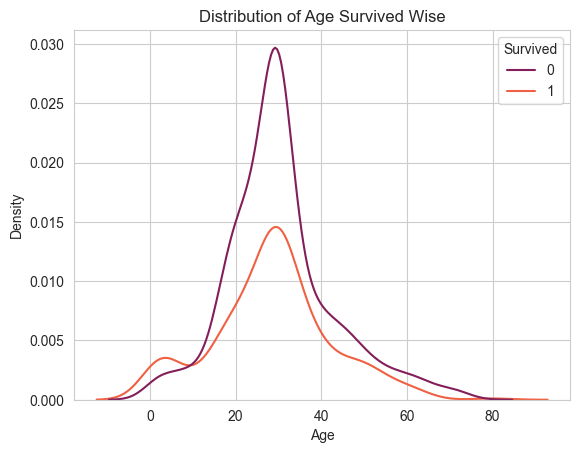

In [37]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=df_train['Age'],hue=df_train['Survived'], palette='rocket')
plt.title('Distribution of Age Survived Wise')
plt.show()

Relevant to the above conclusion, the death rate is also higher for peopel belonging to 20-40 age group.

### Fare Column

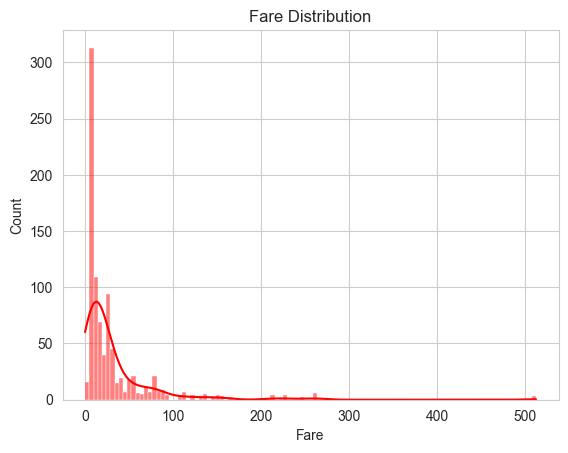

In [38]:
# Plotting fare distribution
sns.histplot(x='Fare', data=df_train, kde=True,color='red')
plt.title('Fare Distribution')
plt.show()

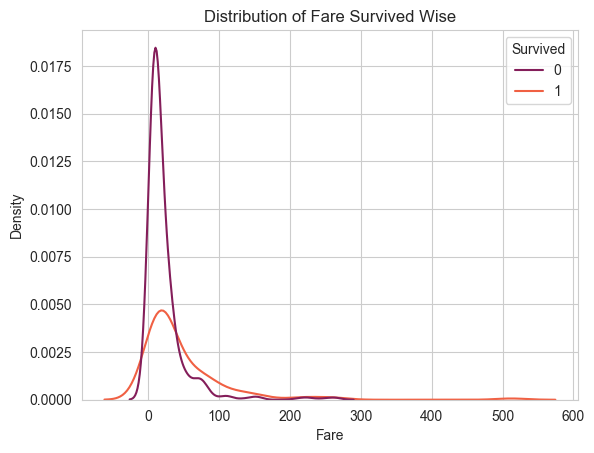

In [39]:
# Showing Distribution of Fare by Survived
sns.kdeplot(x=df_train['Fare'],hue=df_train['Survived'], palette='rocket')
plt.title('Distribution of Fare Survived Wise')
plt.show()

### Parch Column

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

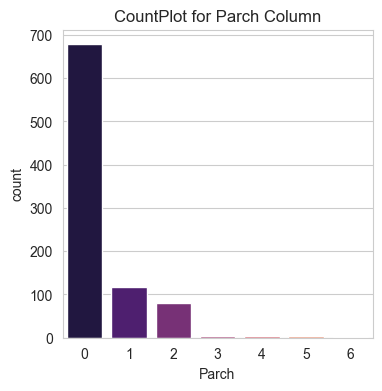

In [40]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['Parch'],palette='magma')
plt.title('CountPlot for Parch Column')
df_train['Parch'].value_counts()

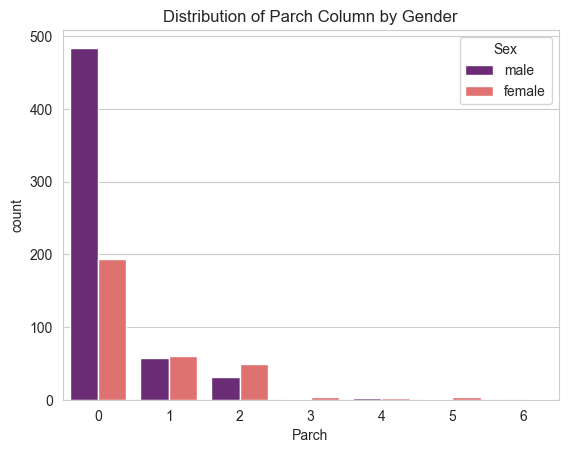

In [41]:
## Number of people by Gender having Parent or Child
sns.countplot(x='Parch',hue='Sex',data=df_train,palette='magma')
plt.title('Distribution of Parch Column by Gender')
plt.show()

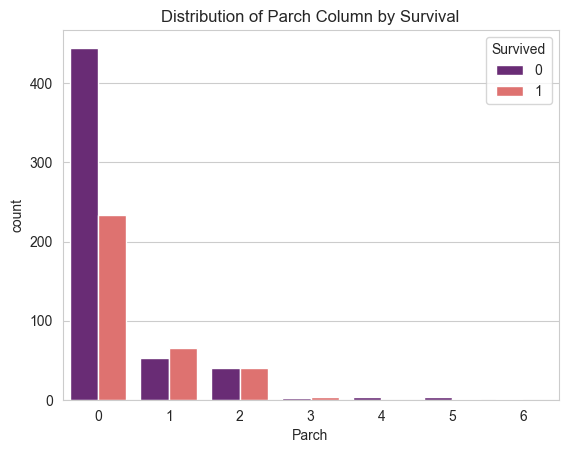

In [42]:
## Number of people survived having Parent or Child
sns.countplot(x='Parch',hue='Survived',data=df_train,palette='magma')
plt.title('Distribution of Parch Column by Survival')
plt.show()

In [43]:
## Percentage distribution of Parch by Survived
df_train.groupby(['Parch'])['Survived'].mean()*100

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

### Embarked Column

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

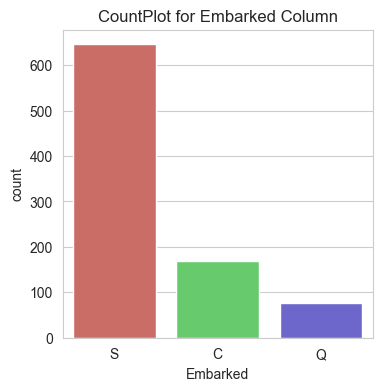

In [44]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.countplot(x=df_train['Embarked'],palette='hls')
plt.title('CountPlot for Embarked Column')
df_train['Embarked'].value_counts()

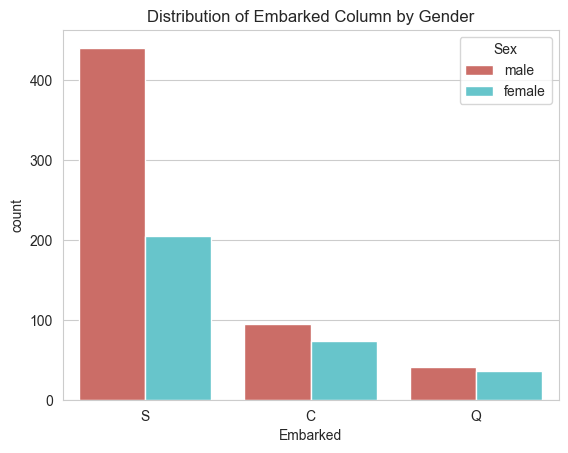

In [45]:
## Number of people by Gender having Parent or Child
sns.countplot(x='Embarked',hue='Sex',data=df_train,palette='hls')
plt.title('Distribution of Embarked Column by Gender')
plt.show()

We can made following observations-:

1. The death count is more than survived for S embarked
2. The survival count is more than died for C embarked
3. The death count is more than survived for Q embarked

In [46]:
print(df_train['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [47]:
# Converting categorical variables to numerical
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [48]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [49]:
## showing correlation
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


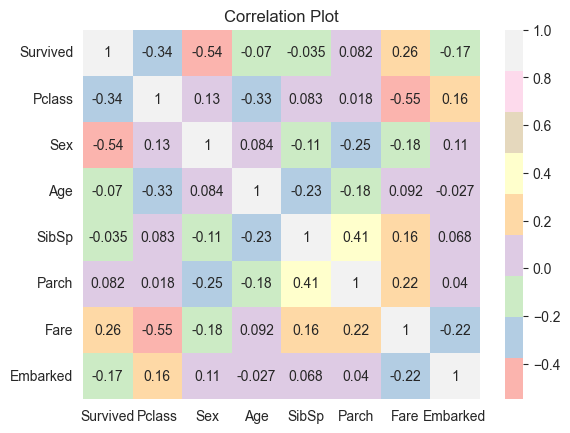

In [50]:
#showing correlation matrix as a heatmap
sns.heatmap(df_train.corr(),annot=True,cmap='Pastel1')
plt.title('Correlation Plot')
plt.show()

## Conclusion

The given titatic dataset include features like PassengerId, Survived, Pclass, Name, Sex, Age etc of the onboard passengers. By performing the exploratory data analysis (EDA) we are able to figure out the survival rate of passengers with reprect to their sex, age, classes and more. The age/fare and sibsp/parch column gives a clear understanding of the overall passenger survival having relationship with co-pasengers as siblings, spouse or parent,child. There can be many more operations performed by utilising other colums as well and using decision classifier and test train split we can even find accuracy of the survival by model training.